<a href="https://colab.research.google.com/github/diwakarsachan/marketing-project-final/blob/main/marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML WorkFlow / Blueprint
  ### Load data
### EDA (Exploratory data analysis)
* Graphing
* Do we have outliers?
* Do we have nulls / invalids ?
* Do we have duplicates?
* Correlation matrix
### Cleanup
* Fix null values (drop / replace)
* De-dupe
* Any other cleanup
### Shape data for ML
* Encode categorical data into numbers
* Scale data if necessary
* Feature selection
* Figure out X,y
* train/test split
* Actually, do cross-validation
### Train the algorithm
### Evaluated the model
* Scoring / metrics
* Regression : r2, rmse (and more)
* classification : accuracy, confusion matrix (and more)
### Improved our model  (while keeping notes!)
* Iterations
* Added more features
* Scaling 
### Deploy 


In [5]:
# Import libraries 
import pandas as pd 
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
data_location = "bank-full.csv"
data_url = 'https://github.com/diwakarsachan/marketing-project-final/raw/main/bank-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: bank-full.csv


In [4]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

marketing_outcome = pd.read_csv(data_location, sep=';')
marketing_outcome.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9261,37,self-employed,single,tertiary,no,281,yes,no,unknown,5,jun,869,2,-1,0,unknown,no
41606,25,management,single,tertiary,no,808,no,no,cellular,18,sep,267,2,114,2,failure,yes
43280,27,management,single,tertiary,no,948,yes,no,cellular,12,mar,121,2,207,1,failure,no
43595,32,management,married,tertiary,no,6138,no,no,cellular,30,apr,211,2,196,7,success,no
21105,45,housemaid,married,primary,no,0,no,no,cellular,14,aug,195,2,-1,0,unknown,no
41690,61,retired,married,secondary,no,2917,no,no,cellular,6,oct,215,1,-1,0,unknown,yes
22769,35,technician,divorced,secondary,no,0,no,no,cellular,25,aug,124,4,-1,0,unknown,no
36894,40,services,divorced,secondary,no,209,yes,no,cellular,12,may,302,2,344,3,other,no
38600,36,student,single,secondary,no,3551,yes,no,telephone,15,may,134,9,-1,0,unknown,no
4420,34,services,married,secondary,no,0,yes,no,unknown,20,may,79,1,-1,0,unknown,no


In [32]:
marketing_outcome =marketing_outcome.replace({'default': {'yes': True, 'no': False}, 'housing': {'yes': True, 'no': False}, 'loan': {'yes': True, 'no': False}, 'y': {'yes': True, 'no': False}})

In [33]:
marketing_outcome.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4630,43,blue-collar,married,primary,True,-635,True,False,unknown,20,may,37,9,-1,0,unknown,False
34464,30,blue-collar,single,secondary,False,80,True,True,cellular,5,may,145,1,337,4,failure,False
8194,48,admin.,married,secondary,False,749,True,False,unknown,2,jun,56,3,-1,0,unknown,False
5318,31,entrepreneur,single,secondary,False,159,True,False,unknown,23,may,533,1,-1,0,unknown,False
8483,30,admin.,married,secondary,False,-366,True,True,unknown,3,jun,102,1,-1,0,unknown,False
286,47,admin.,married,secondary,False,368,True,False,unknown,5,may,125,2,-1,0,unknown,False
42587,46,management,divorced,tertiary,False,461,False,False,cellular,30,dec,369,2,-1,0,unknown,True
23677,45,self-employed,married,tertiary,False,240,False,False,cellular,28,aug,163,4,-1,0,unknown,False
39902,53,entrepreneur,married,primary,False,55,False,False,cellular,2,jun,217,1,-1,0,unknown,False
4035,34,blue-collar,married,primary,False,695,True,True,unknown,16,may,1064,4,-1,0,unknown,True


# Explore Data (EDA)
* Mean/Median 
* Various charts
* Outliers in data


In [34]:
marketing_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  bool  
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  bool  
 7   loan       45211 non-null  bool  
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  bool  
dtypes: bool(4), int64(7), object(6)
memory usage: 4.7+ MB


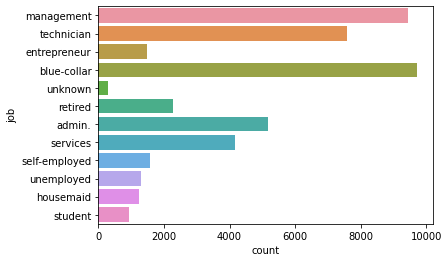

In [11]:
sns.countplot(data=marketing_outcome, y='job')


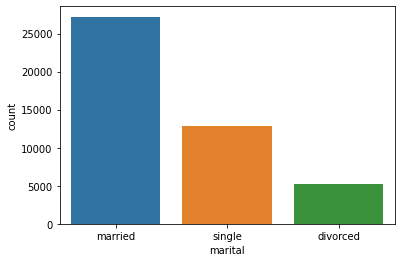

In [12]:
sns.countplot(data=marketing_outcome, x='marital')

In [13]:
## Check data skew
marketing_outcome['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
# Correlation Matrix
marketing_outcome.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


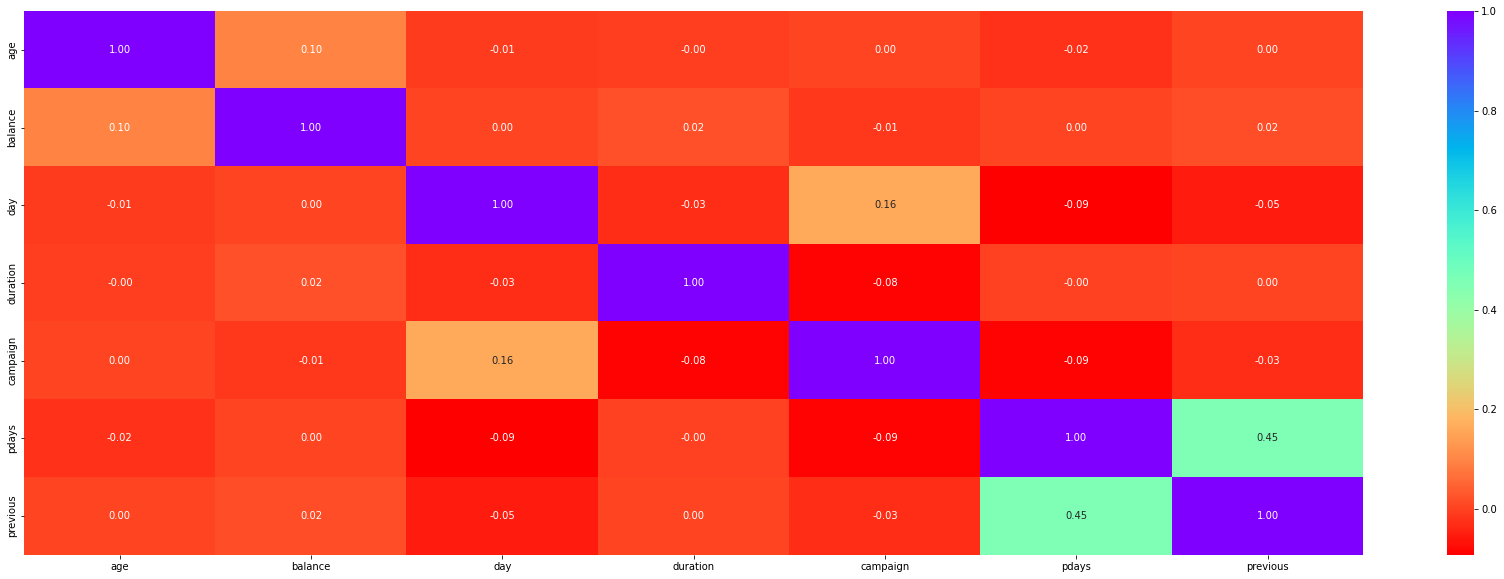

In [15]:
plt.figure(figsize = (30,10))

#sns.set_context("talk", font_scale=0.9) 
sns.heatmap(marketing_outcome.corr(), cmap='rainbow_r', annot=True, fmt='.2f')

# Shape Data
* Lot of work and analysis is needed
* Interpretation is also important 

In [35]:
label_col = 'y'

feature_columns = marketing_outcome.columns
feature_columns = feature_columns.drop (['job', 'marital', 'education', 'contact', 'month', 'poutcome']) # What else needs to be dropped??
print (feature_columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y'],
      dtype='object')


In [36]:
X = marketing_outcome[feature_columns]
y = marketing_outcome[[label_col]]

print (X.shape)
print (y.shape)

(45211, 11)
(45211, 1)


In [37]:
X_train,X_test,y_train, y_test = train_test_split(X,y,  test_size=.2, random_state=123)

print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (36168, 11)
x_test : (9043, 11)
y_train : (36168, 1)
y_test : (9043, 1)


# Train the algorithm 

### Algorithm
* Logistic
* SVM
* RF
* GB
* MLP
* What else?

In [44]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

# algo = LogisticRegression(max_iter=500)
#algo = LinearSVC(max_iter=5000)
algo = RandomForestClassifier()
#algo = GradientBoostingClassifier()

# Fit
model = algo.fit(X_train, np.ravel(y_train))
print (model)

RandomForestClassifier()
CPU times: user 1.18 s, sys: 0 ns, total: 1.18 s
Wall time: 1.18 s


# Evaluate Model
* Scoring / metrics
* Regression : r2, rmse (and more)
* classification : accuracy, confusion matrix (and more)


In [40]:
y_pred = model.predict (X_test)
y_pred

array([ True, False, False, ..., False, False, False])

In [41]:
train_accuracy = model.score(X_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  1.0


In [42]:
test_accuracy = model.score(X_test, y_test)
print ("Test accuracy: ", test_accuracy)

Test accuracy:  1.0


In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,False,True
False,7986,0
True,0,1057


[]

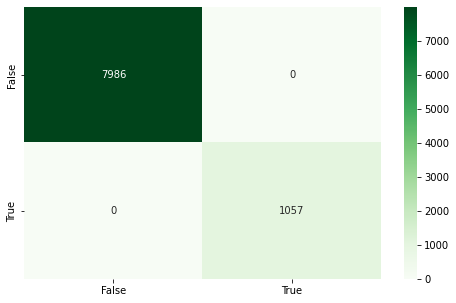

In [47]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='d').plot()

In [ ]:
# TODO - Model Serving / Use Scikit-learn ML Pipeline / What else?